# Project Overview

This project delves into the analysis of a previous marketing campaign for a financial institution, aiming to unearth patterns and strategies that can enhance the efficacy of future marketing endeavors. The primary objective is to elevate the Return on Investment (ROI) for upcoming campaigns by comprehending the bank's performance in the last campaign.

To achieve this, we employ machine learning techniques. Initial steps involve data visualization to discern patterns and trends in the campaign results. Subsequently, a machine learning model, LightGBM, is utilized for predictions regarding campaign effectiveness. To interpret these predictions, we leverage the SHAP library.

In essence, the project seeks to provide valuable insights into the past campaign's performance, enabling data-driven decisions for the optimization of future marketing campaigns and, consequently, elevating the overall effectiveness of the financial institution.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns


# Attributes Description:

### Bank client data:
* 1 - age: (numeric)
* 2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education: (categorical: primary, secondary, tertiary and unknown)
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
* 8- balance: Balance of the individual.

###  Related with the last contact of the current campaign:¶
* 9 - contact: contact communication type (categorical: 'cellular','telephone')
* 10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 11 - day: last contact day of the week
* 12 - duration: last contact duration, in seconds (numeric).
###  Other attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):
* 17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Source
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

In [2]:
data=pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


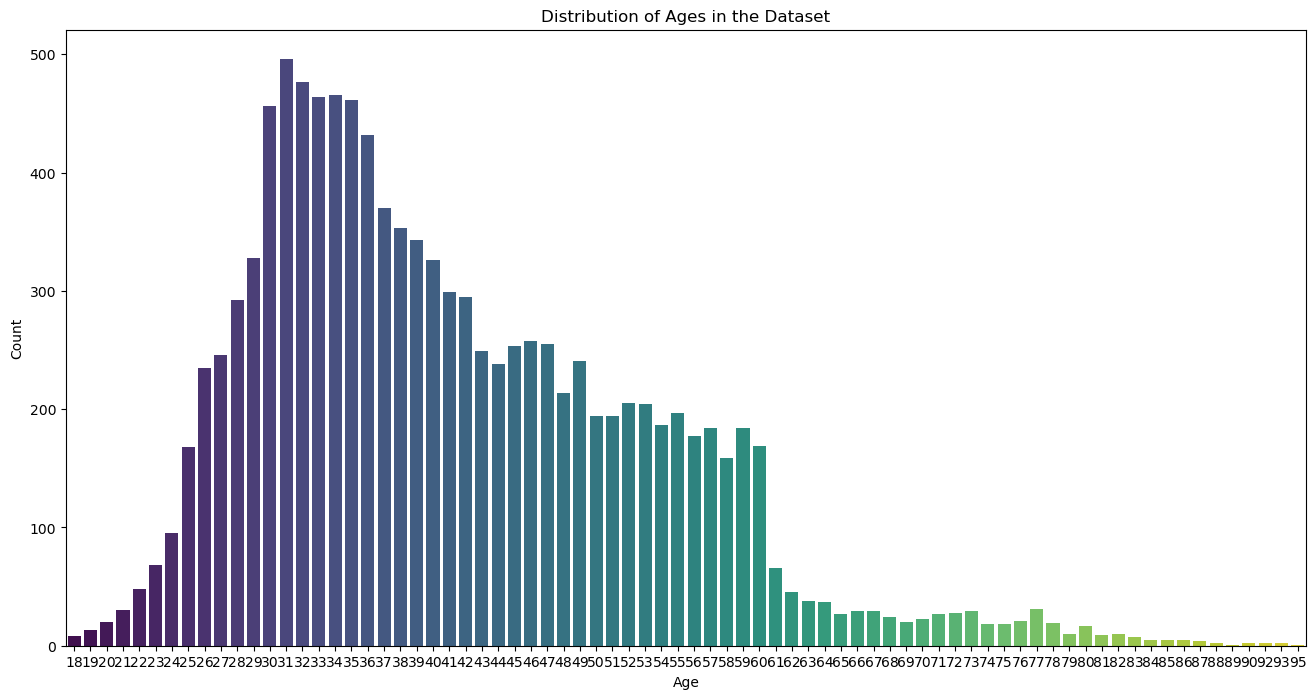

In [5]:
plt.figure(figsize=(16, 8))
sns.countplot(x='age', data=data, palette='viridis')
plt.title('Distribution of Ages in the Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

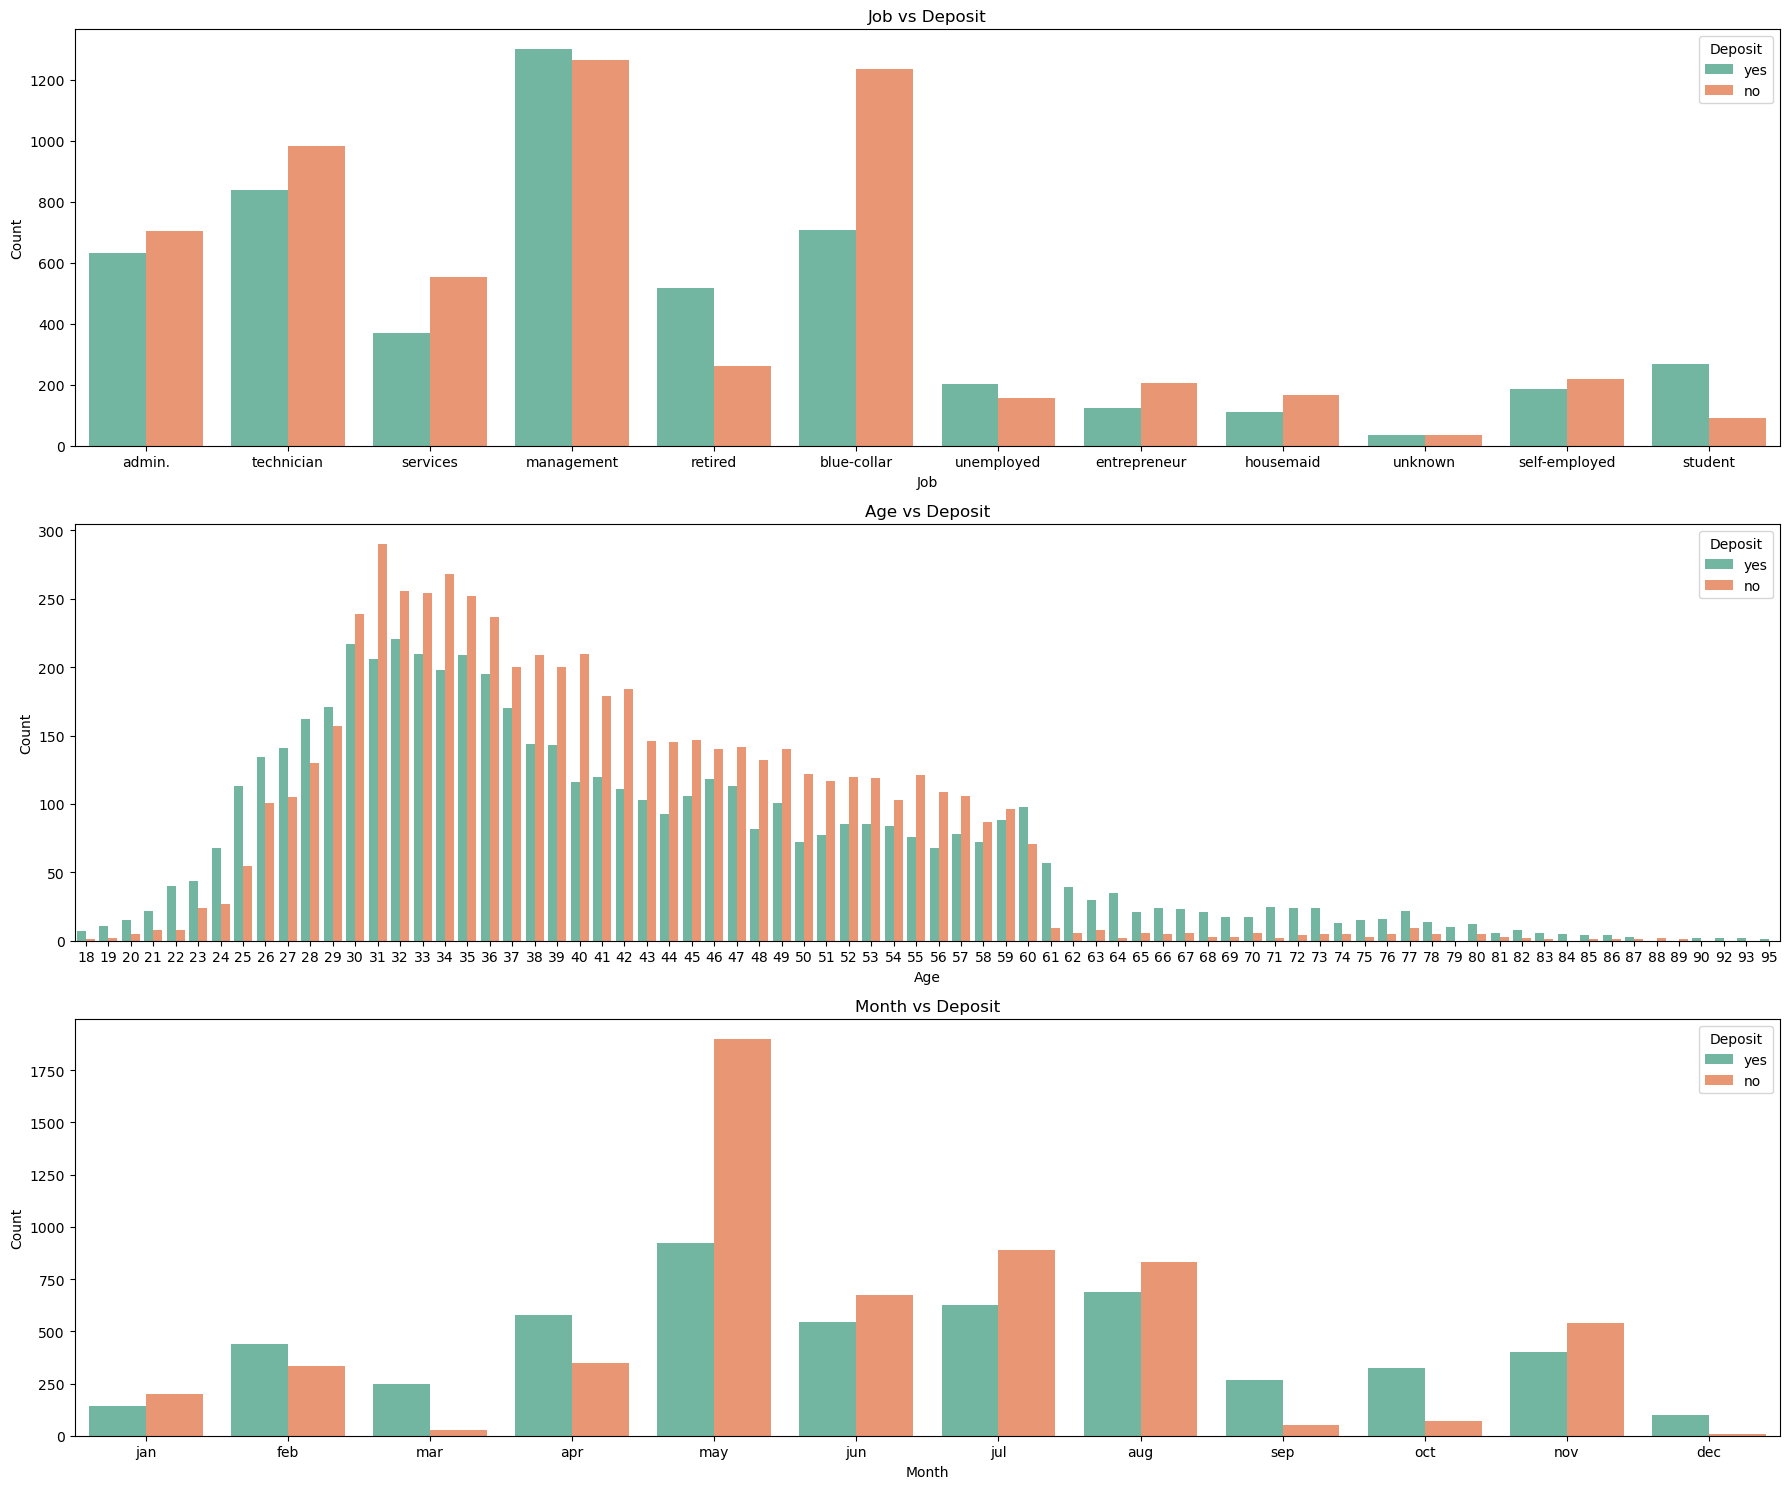

In [6]:
plt.figure(figsize=(18, 15))

# Subplot 1
plt.subplot(3, 1, 1)
sns.countplot(x='job', hue='deposit', data=data, palette='Set2')
plt.title('Job vs Deposit')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')

# Subplot 2
plt.subplot(3, 1, 2)
sns.countplot(x='age', hue='deposit', data=data, palette='Set2')
plt.title('Age vs Deposit')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')

# Subplot 3
plt.subplot(3, 1, 3)
sns.countplot(x='month', hue='deposit', data=data, palette='Set2', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Month vs Deposit')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')

plt.tight_layout()
plt.show()

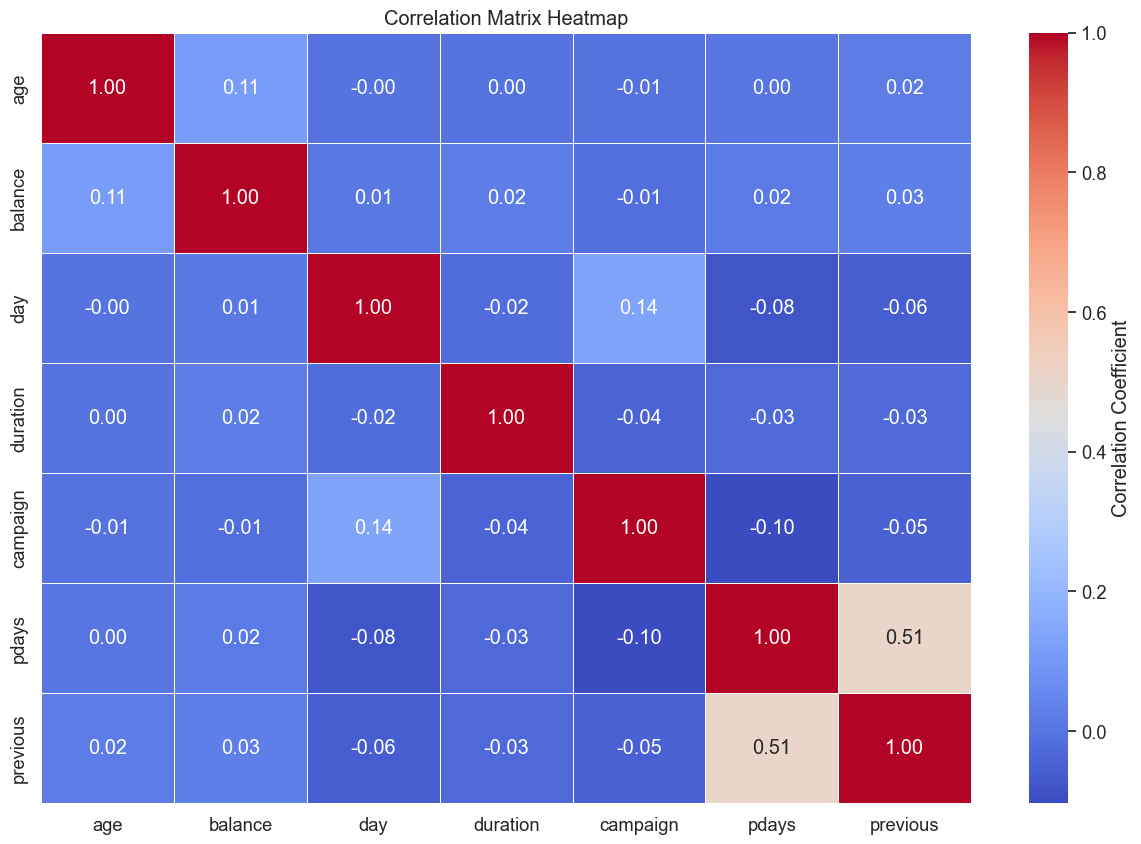

In [7]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)

# Generate heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

# Set title
plt.title('Correlation Matrix Heatmap')

plt.show()

<Figure size 1200x600 with 0 Axes>

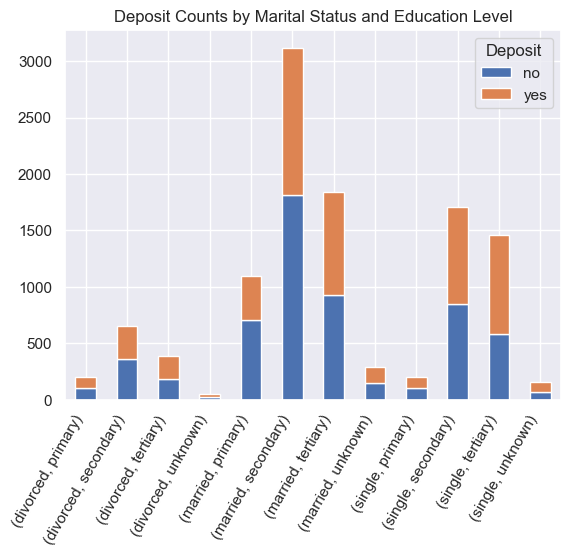

In [8]:
# Set seaborn style
sns.set(style='darkgrid')

# Grouped bar chart
plt.figure(figsize=(12, 6))
grouped_data = data.groupby(['marital', 'education'])['deposit'].value_counts().unstack().plot(kind='bar', stacked=True)

# Customize plot
plt.xticks(rotation=60, ha='right')
plt.xlabel(None)
plt.title('Deposit Counts by Marital Status and Education Level')
plt.legend(title='Deposit', loc='upper right')

plt.show()

<Figure size 1500x1500 with 0 Axes>

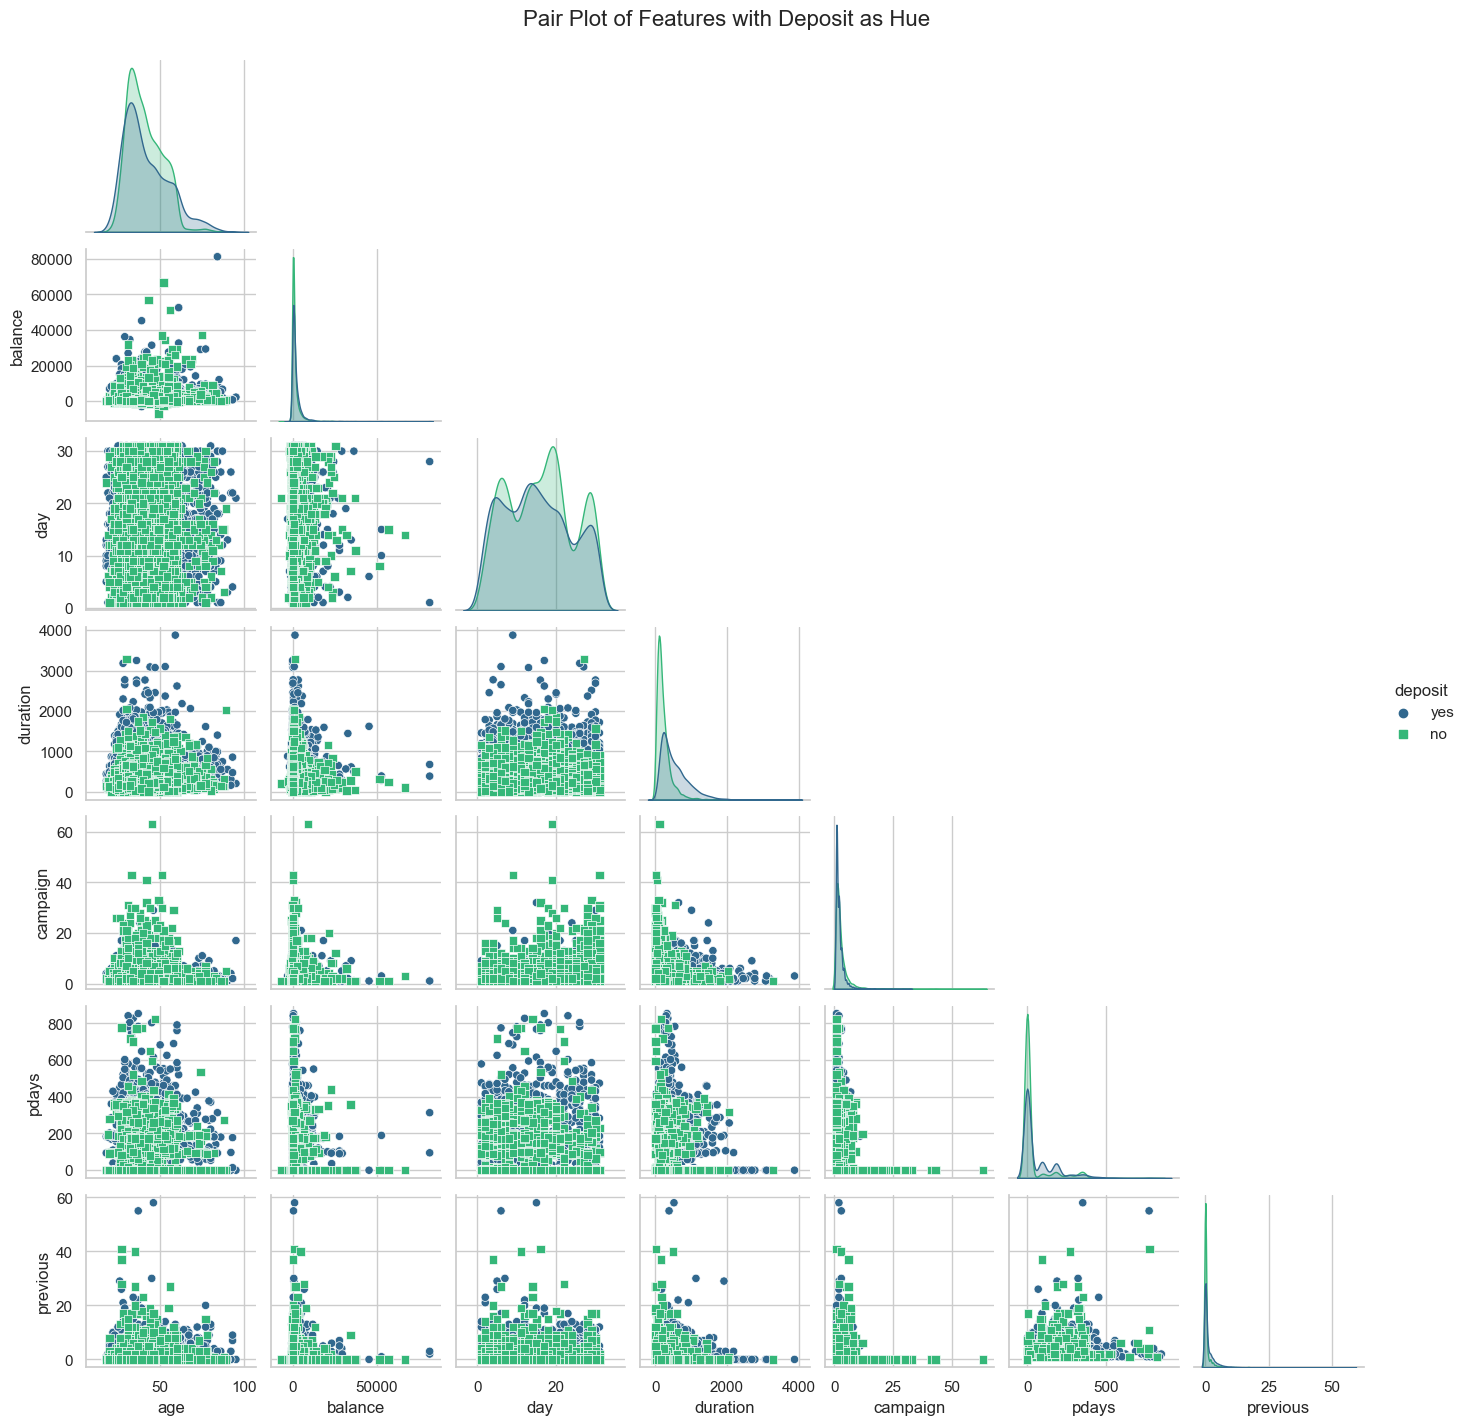

In [9]:
# Set seaborn style
sns.set(style='whitegrid')

# Pair plot with deposit as hue
plt.figure(figsize=(15, 15))
sns.pairplot(data=data, hue='deposit', palette='viridis', markers=["o", "s"], diag_kind='kde', height=2, corner=True)

# Adjust plot appearance
plt.suptitle('Pair Plot of Features with Deposit as Hue', y=1.02, fontsize=16)
plt.show()

# Interpretation Summary

Upon conducting initial exploratory analysis, it is evident that the dataset is devoid of missing values. The average customer age is approximately 41 years, with the majority falling within the 25-60 age range, as depicted in the age column's countplot. The correlation analysis using `data.corr()` reveals a low correlation (0.112300) between age and balance, and a moderate correlation (0.507272) between the number of previous contacts and the campaign contacts.

Regarding the campaign's impact on customers, divorced individuals seem to have experienced a relatively low impact. Further investigation is recommended to uncover the reasons behind this and explore potential strategies for enhancing campaign effectiveness among this demographic.

A notable observation is the positive correlation (0.137) between 'day' and 'campaign,' suggesting a pattern where increased customer contact during the campaign correlates with higher success rates. This pattern implies that a more proactive outreach strategy may lead to increased campaign effectiveness.

# Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate through columns in the dataframe
for column in data.columns:
    if data[column].dtype == 'object':
        # If 2 or fewer unique categories
        if len(data[column].unique()) <= 2:
            data[column] = label_encoder.fit_transform(data[column])

# One-hot encode remaining categorical columns
data1 = pd.get_dummies(data)

# Print the number of columns that were label encoded and one-hot encoded
encoded_columns = [column for column in data.columns if data[column].dtype == 'int']
one_hot_columns = [column for column in data1.columns if column not in data.columns]
print(f'{len(encoded_columns)} columns were label encoded.')
print(f'{len(one_hot_columns)} columns were one-hot encoded.')

4 columns were label encoded.
38 columns were one-hot encoded.


In [11]:
#after label encoded
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [12]:
#after one-hot encoded
data1.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,56,0,45,0,0,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,41,0,1270,1,0,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,55,0,2476,1,0,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,54,0,184,0,0,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
5,42,0,0,1,1,5,562,2,-1,0,...,False,False,True,False,False,False,False,False,False,True
6,56,0,830,1,1,6,1201,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
7,60,0,545,1,0,6,1030,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
8,37,0,1,1,0,6,608,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
9,28,0,5090,1,0,6,1297,3,-1,0,...,False,False,True,False,False,False,False,False,False,True


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int32
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int32
 4   loan                 11162 non-null  int32
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int32
 11  job_admin.           11162 non-null  bool 
 12  job_blue-collar      11162 non-null  bool 
 13  job_entrepreneur     11162 non-null  bool 
 14  job_housemaid        11162 non-null  bool 
 15  job_management       11162 non-null  bool 
 16  job_retired          1

In [14]:
bool_columns = data1.select_dtypes(include='bool').columns
data1[bool_columns] = data1[bool_columns].astype(int)

In [15]:
data1.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
5,42,0,0,1,1,5,562,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
6,56,0,830,1,1,6,1201,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
7,60,0,545,1,0,6,1030,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
8,37,0,1,1,0,6,608,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
9,28,0,5090,1,0,6,1297,3,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
data1.tail(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
11152,34,0,390,1,0,15,659,3,-1,0,...,0,0,0,0,0,0,0,0,0,1
11153,43,0,35,0,0,9,208,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
11154,52,0,523,1,1,8,113,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11155,35,0,80,1,1,21,38,2,172,2,...,0,0,0,1,0,0,1,0,0,0
11156,34,0,-72,1,0,7,273,5,-1,0,...,0,0,0,0,0,0,0,0,0,1
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,1,0,0,0,1,0,0,0
11161,34,0,0,0,0,9,628,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


# Cross Validation

In [17]:
X=data1.drop(columns='deposit',axis=1)
y=data1.deposit

In [18]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

# Add 'stratify=y' to ensure that the distribution of the target variable is similar in both training and testing sets


# Light GBM

In [19]:
import lightgbm as lgb
from sklearn.feature_selection import RFE
model = lgb.LGBMClassifier(learning_rate= 0.01,n_estimators=1000)
model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 4231, number of negative: 4698
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.134231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 8929, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473849 -> initscore=-0.104699
[LightGBM] [Info] Start training from score -0.104699


LGBMClassifier(learning_rate=0.01, n_estimators=1000)

In [20]:
y_pred= model.predict(X_test)

[[984 191]
 [122 936]]
0.8598298253470668


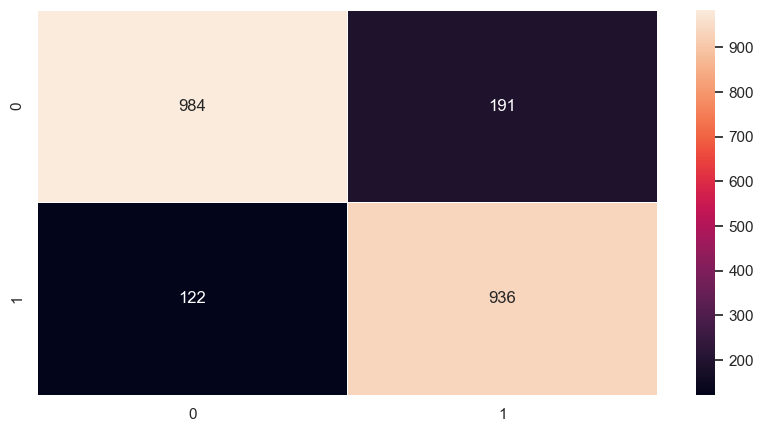

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

This confusion matrix indicates the performance of your classifier. Here's the breakdown:
True Positives (TP): 936
True Negatives (TN): 984
False Positives (FP): 191
False Negatives (FN): 122


The accuracy score is approximately 85.98%, indicating the proportion of correctly classified instances out of the total instances in the test set.

# Checking overfitting

In [23]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))


Training set score: 0.9082
Test set score: 0.8598


Overall, the model is performing well in terms of accuracy and is able to correctly predict the outcome of the campaign for the majority of cases. However, it may be worth investigating further to understand why there are a significant number of false negatives and false positives in the predictions made by the model, and whether there are any specific strategies that can be implemented to improve the model’s performance.

# SHAP (SHapley Additive exPlanations)

SHAP values provide a comprehensive metric for feature importance applicable to any machine learning model. Rooted in cooperative game theory's Shapley values, they ensure equitable distribution of contribution among contributing factors.

In machine learning, SHAP values attribute a specific contribution to each feature for a given prediction. Positive or negative values signify whether a feature positively or negatively influenced the predicted outcome. Aggregating these contributions across all predictions unveils how the model generally operates and highlights pivotal features.

Noteworthy advantages of SHAP values over conventional measures like permutation importance or tree-based model feature importances include:

1. **Model-Agnostic:** Applicable to any model.
2. **Interaction Handling:** Accounts for feature interactions, crucial for deciphering non-linear models.
3. **Robust Handling:** Accommodates categorical variables, missing values, and non-unique feature values.

SHAP plots facilitate visualizing feature-prediction relationships, enabling a deeper comprehension of the model's behavior. These visualizations assist in pinpointing influential features for specific predictions, unraveling how each feature contributes to the final outcome. Armed with this insight, we can identify key features shaping predictions, refining the model, and making more informed decisions.

100%|===================| 2232/2233 [18:23<00:00]        

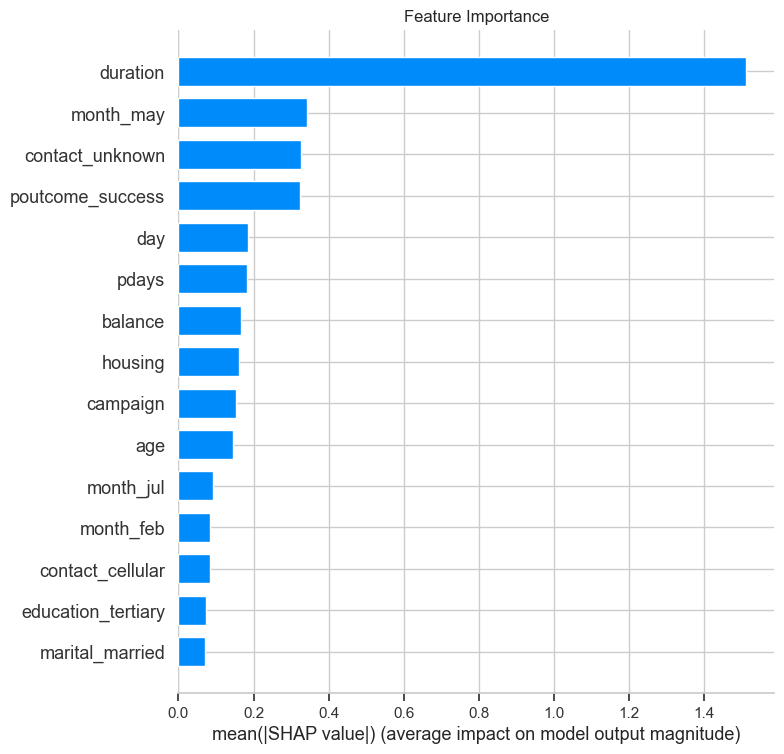

In [24]:
import shap
import matplotlib.pyplot as plt

# 'model' is the trained model and 'X_train' and 'X_test' are the training and testing feature sets
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Plotting feature importance using a bar plot
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=15, show=False)

plt.title('Feature Importance')
plt.show()


> Utilizing a matrix of SHAP values in the bar plot function generates a comprehensive feature importance visualization. This global plot represents the mean absolute value of each feature across all samples, offering insights into the overall impact of individual features on the model.

> The beeswarm plot serves as an information-dense summary, shedding light on how the top features influence the model's output. This visualization provides a nuanced understanding, making it a valuable tool for exploring and generating insights for further consideration.

In [31]:
# Creating a beeswarm plot to visualize the impact of top features on the model's output.
# This information-dense summary aids in understanding feature influence.
#explainer = shap.Explainer(model,X_train)
#shap_values = explainer.shap_values(X_test)
#shap.plots.beeswarm(shap_values, max_display=15)

# Display the plot
#plt.show()

In [32]:
#shap.plots.waterfall(shap_values[0],max_display=10)
#plt.show()

In [33]:
#shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))
#plt.show()

## Shap Interpretation
>The analysis highlights a direct correlation between the campaign duration and the customer's decision, with a notable decrease in effectiveness observed during May. The beeswarm graph underscores this trend, portraying a higher concentration of negative shap values for the "month_may" feature, signifying its adverse impact on prediction outcomes.

>Furthermore, insights from past campaign outcomes indicate that customers who previously responded positively are more likely to do so in future campaigns. This underscores the effectiveness of targeting previously successful customers as a strategic approach.

>Moreover, a positive correlation has been identified between campaign effectiveness and the customer's balance amount. This suggests a more targeted approach by focusing on customers with appropriate balance amounts, rather than a broad strategy. In summary, the analysis recommends targeting previous successful customers, concentrating on those with suitable balances, and avoiding campaigns in May for an optimized and effective marketing strategy.

 99%|===================| 2219/2233 [02:07<00:00]        

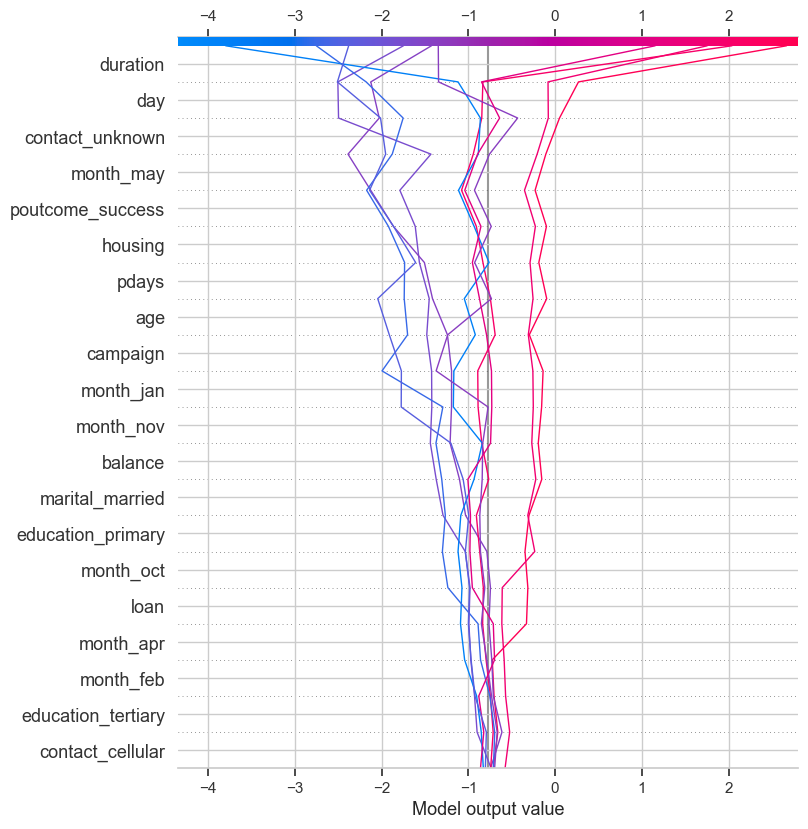

In [29]:
# Creating a decision plot to visualize the impact of features on model decisions for a subset of samples.
# This plot helps understand the contributions of features to individual predictions.

# Display the decision plot for the first 10 samples
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))
plt.show()

100%|===================| 2225/2233 [02:23<00:00]        

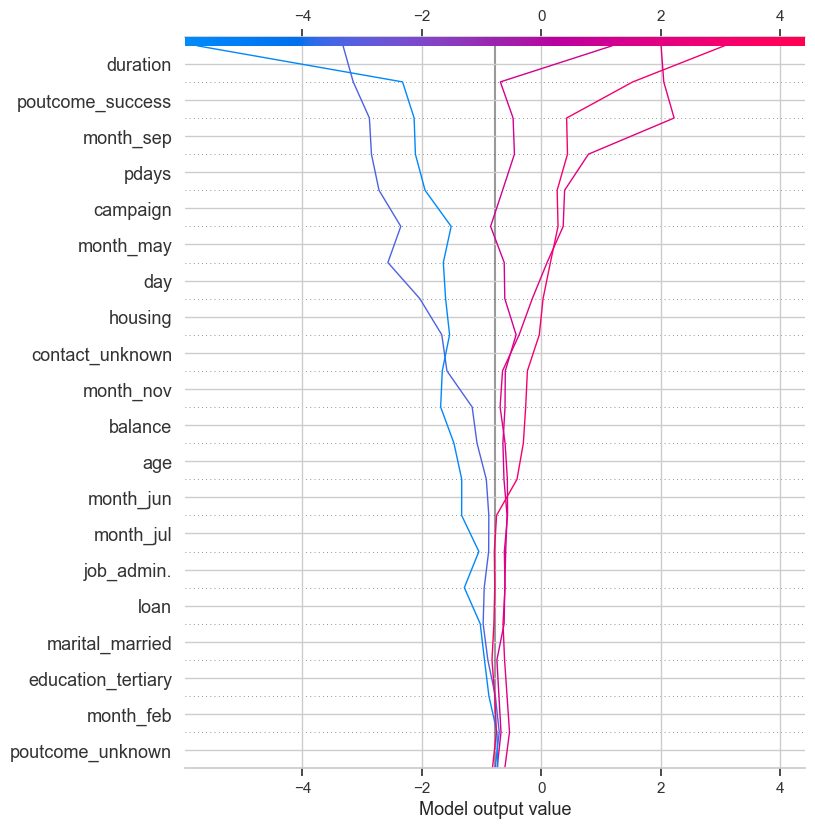

In [30]:
# Creating a decision plot to visualize the impact of features on model decisions for a subset of samples.
# This plot helps understand the contributions of features to individual predictions.

# Display the decision plot for samples 20 to 25
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

shap.decision_plot(expected_value, shap_array[20:25],feature_names=list(X_test.columns))
plt.show()

In [34]:
pd.DataFrame(X_test)[20:25]

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
10268,35,0,725,1,0,20,219,7,133,1,...,0,0,0,1,0,0,1,0,0,0
1891,34,0,151,1,0,12,590,1,370,1,...,0,0,1,0,0,0,0,1,0,0
2694,50,0,388,0,0,15,173,2,99,4,...,0,0,0,0,0,1,1,0,0,0
6267,38,0,47,1,1,31,50,11,-1,0,...,0,0,0,0,0,0,0,0,0,1
3614,68,0,2027,0,0,15,619,2,92,2,...,1,0,0,0,0,0,0,0,1,0


# Waterfall interraption

>The waterfall plot serves as a valuable tool to illustrate the feature importance of a model, showcasing the contribution of each feature to the final prediction for a specific observation. Each line in the plot represents a distinct observation, displaying the predicted outcome's dependency on various features along the y-axis, while the x-axis exhibits the corresponding SHAP values.

>In the second waterfall plot, a concise representation was created by visualizing a limited sample of five rows to highlight trends in how features influenced the outcome. However, this approach has its limitations. As the number of observations increases, the plot becomes intricate and challenging to interpret, hindering a comprehensive understanding of the model's workings due to the cluttered nature and difficulty in discerning SHAP values for numerous observations.

# Conclusion

>In summary, this project aimed to scrutinize the outcomes of a prior marketing campaign for a financial institution, seeking patterns and strategies to enhance the efficacy of forthcoming marketing initiatives. Employing machine learning techniques, encompassing data visualization, a LightGBM model, and the SHAP library for result interpretation, the analysis provided valuable insights.

>The findings indicated optimal campaign effectiveness for customers aged between 18-25 and 60-70, suggesting a targeted focus on these age groups in future campaigns. The dip in effectiveness during May prompts further investigation, with consideration for commencing campaigns in the more successful summer and autumn months.

>Loyalty emerged as a key factor, with the campaign resonating well with loyal customers. Strategically targeting these customers could prove more cost-effective in future campaigns. The analysis underscored the pivotal role of campaign duration in influencing customer decisions, emphasizing the impact of providing detailed, simplified product information for heightened awareness and positive outcomes.

>Moreover, a positive correlation between campaign effectiveness and customer balance amounts advocates for a more tailored approach, directing efforts towards customers with appropriate balance amounts rather than employing a broad targeting strategy.

>It is crucial to acknowledge that this analysis offers a foundational insight into the application of machine learning in marketing decisions. Further exploration is warranted to delve into the reasons behind specific findings, considering factors like regional variations and time periods. Nevertheless, the analysis yields valuable insights to enhance the efficacy of upcoming marketing endeavors.